# Iris Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
iris = pd.read_csv('iris.csv' , index_col = 'Id')
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape()

(150, 5)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
iris.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# EDA

<Axes: xlabel='SepalLengthCm', ylabel='count'>

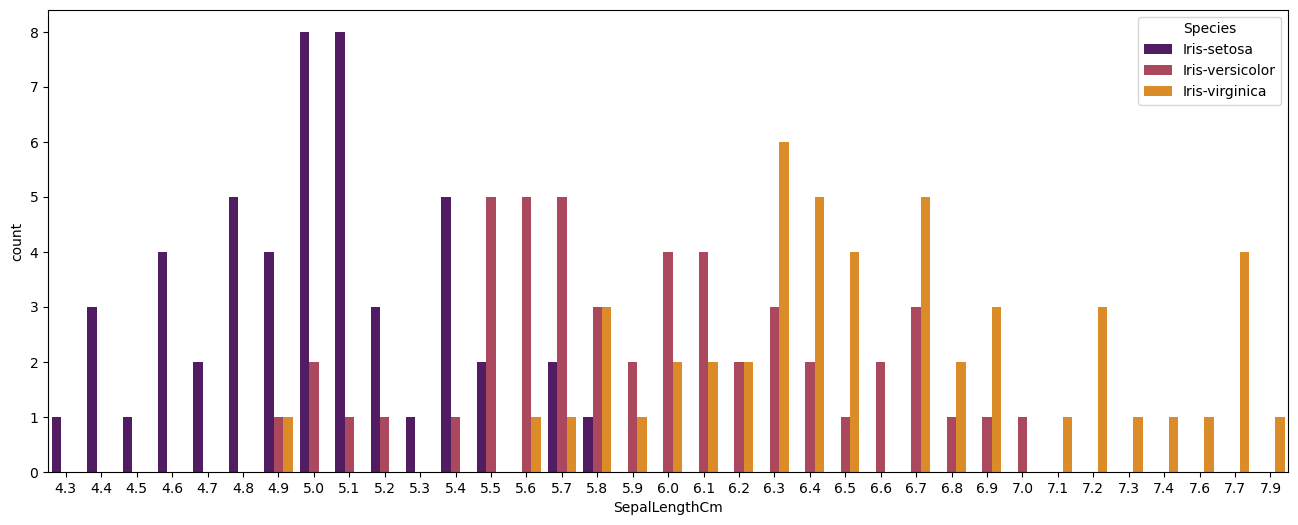

In [11]:
plt.figure(figsize=(16,6))
sns.countplot(x=iris['SepalLengthCm'] , hue = iris['Species'] , palette = 'inferno')

<Axes: xlabel='SepalWidthCm', ylabel='count'>

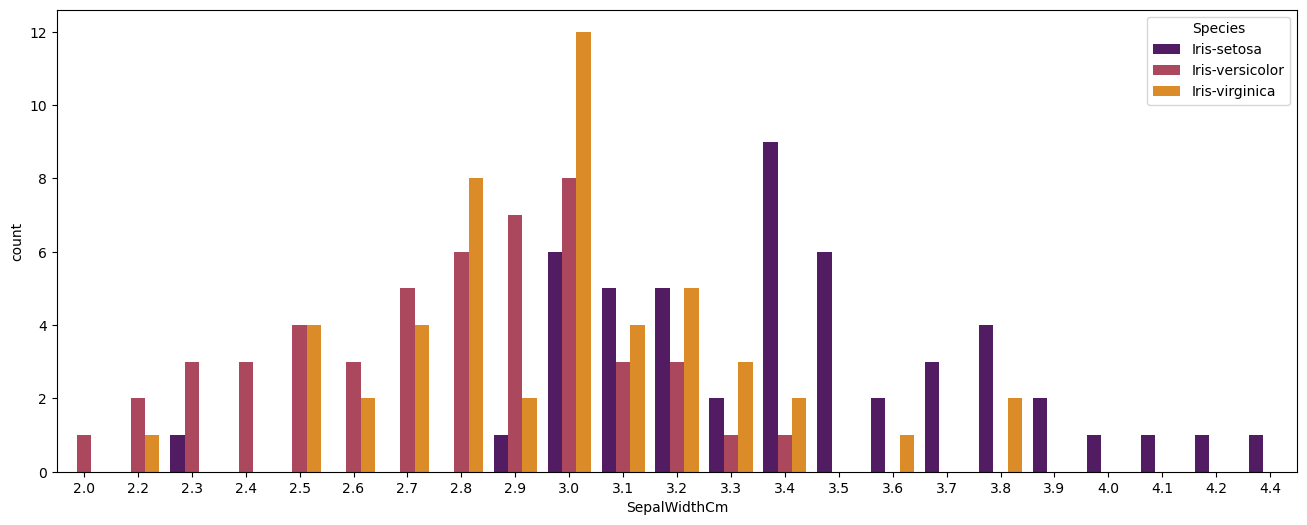

In [12]:
plt.figure(figsize=(16,6))
sns.countplot(x=iris['SepalWidthCm'] , hue = iris['Species'] , palette = 'inferno')

<Axes: xlabel='PetalLengthCm', ylabel='count'>

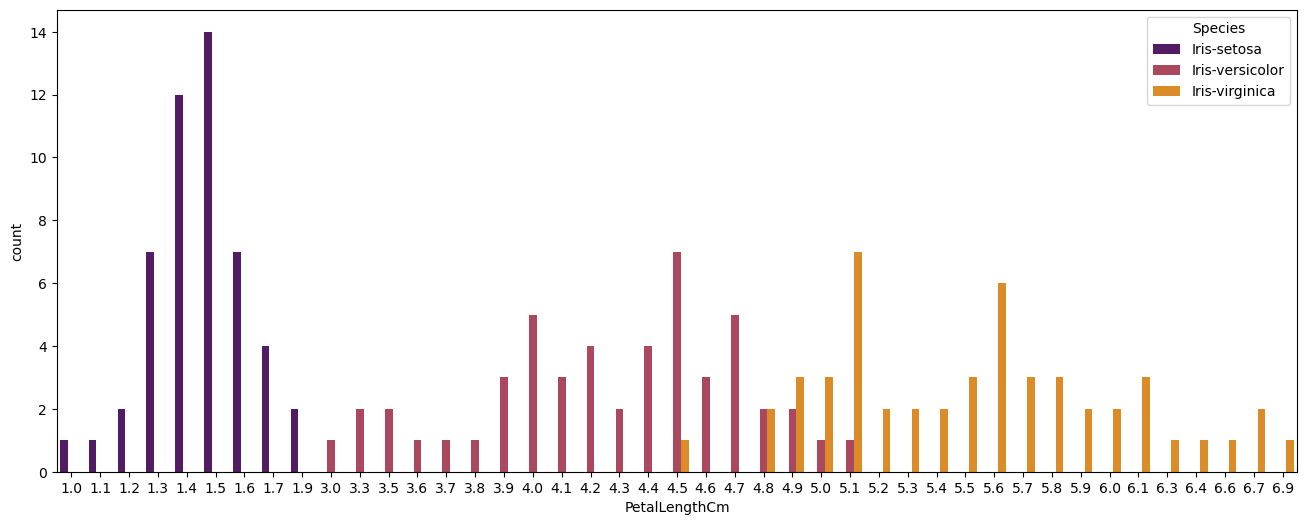

In [13]:
plt.figure(figsize=(16,6))
sns.countplot(x=iris['PetalLengthCm'] , hue = iris['Species'] , palette = 'inferno')

<Axes: xlabel='PetalWidthCm', ylabel='count'>

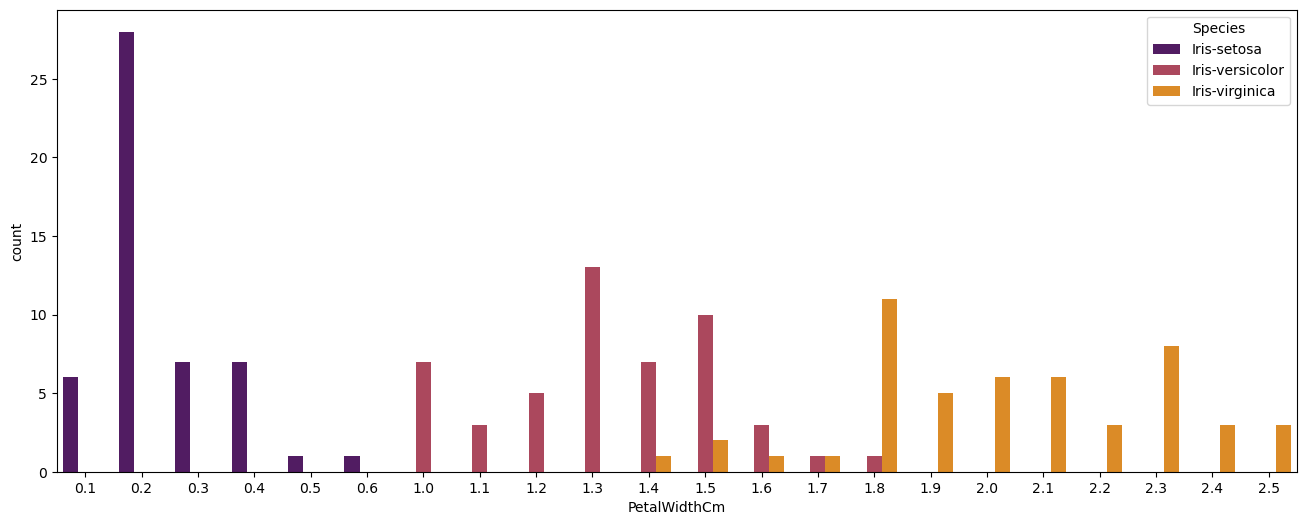

In [14]:
plt.figure(figsize=(16,6))
sns.countplot(x=iris['PetalWidthCm'] , hue = iris['Species'] , palette = 'inferno')

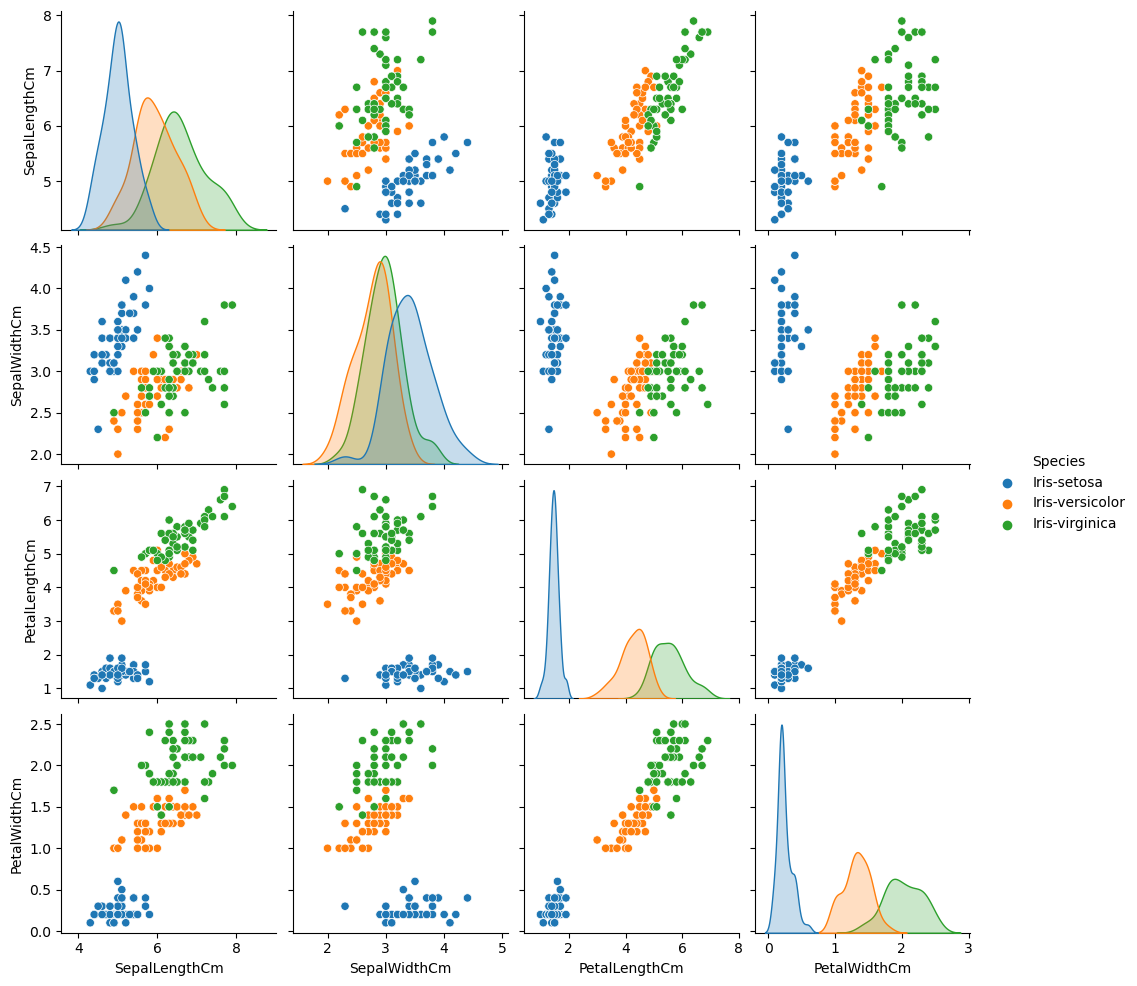

In [15]:
sns.pairplot(iris, hue='Species', diag_kind='kde')

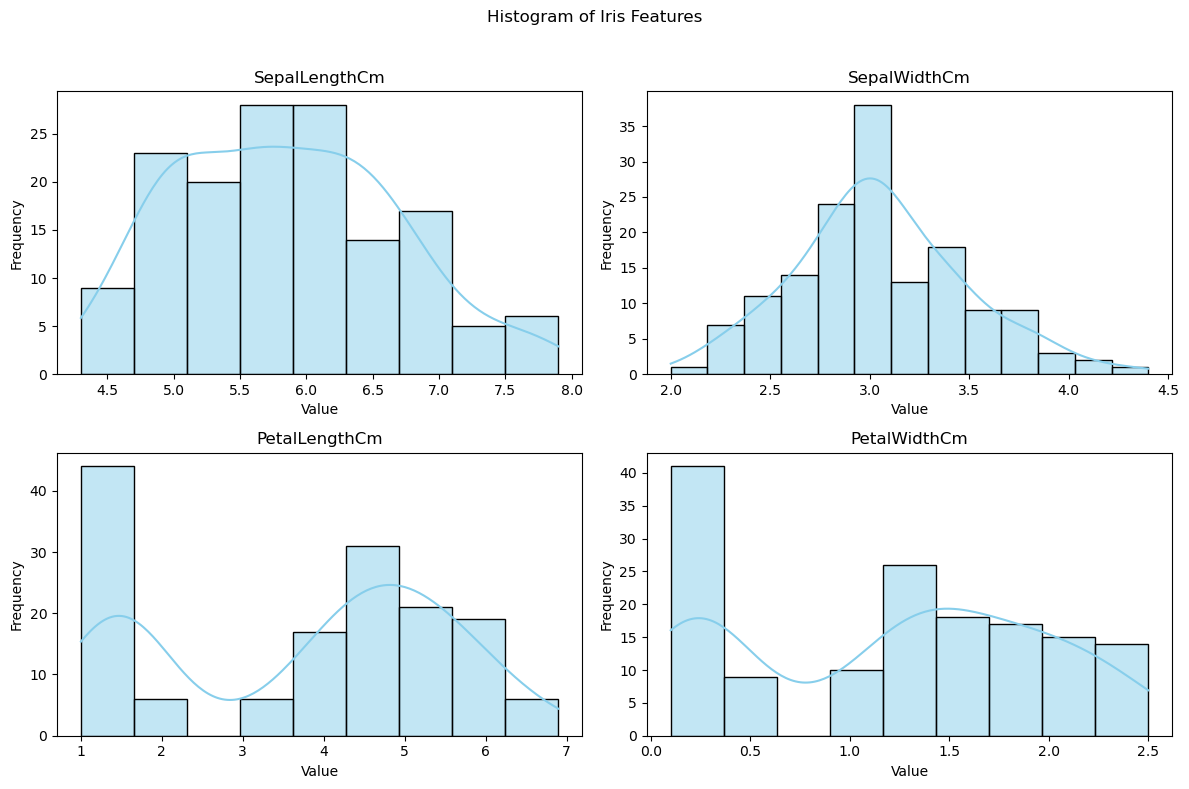

In [6]:

# Plotting histograms for each feature
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Histogram of Iris Features")

features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
for i, ax in enumerate(axes.flatten()):
    sns.histplot(iris[features[i]], kde=True, ax=ax, color='skyblue')
    ax.set_title(features[i])
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


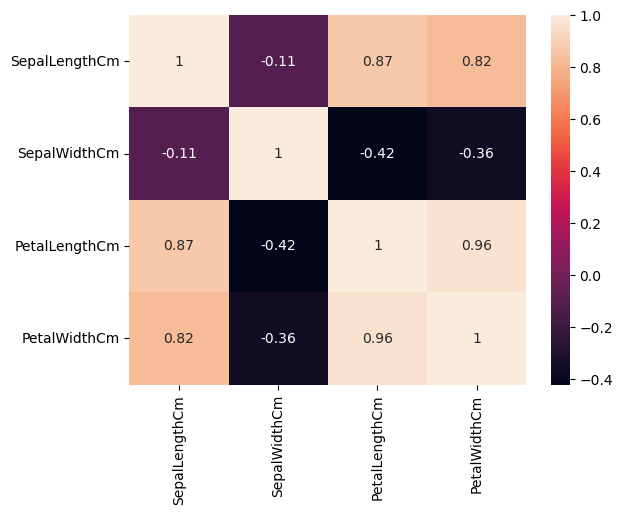

In [32]:
sns.heatmap(iris.corr(),annot = True);
 

# Feature Engineering

In [29]:
import numpy as np

# Adding new features as sepal size and petal size
iris['sepal_size'] = np.sqrt(iris['SepalLengthCm'] * iris['SepalWidthCm'])
iris['petal_size'] = np.sqrt(iris['PetalLengthCm'] * iris['PetalWidthCm'])


iris.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,sepal_size,petal_size
Id,,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,4.224926,0.529150
2,4.9,3.0,1.4,0.2,Iris-setosa,3.834058,0.529150
3,4.7,3.2,1.3,0.2,Iris-setosa,3.878144,0.509902
4,4.6,3.1,1.5,0.2,Iris-setosa,3.776242,0.547723
5,5.0,3.6,1.4,0.2,Iris-setosa,4.242641,0.529150


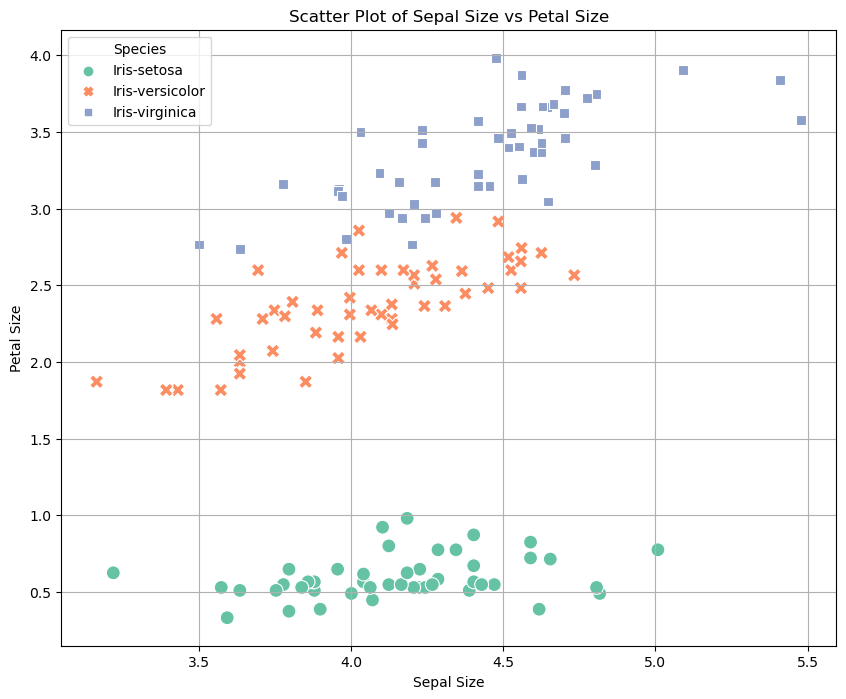

In [30]:
# Scatter plot of sepal size vs petal size
plt.figure(figsize=(10, 8))
sns.scatterplot(data=iris, x='sepal_size', y='petal_size', hue='Species', style='Species', palette='Set2', s=100)
plt.title('Scatter Plot of Sepal Size vs Petal Size')
plt.xlabel('Sepal Size')
plt.ylabel('Petal Size')
plt.legend(title='Species')
plt.grid(True)
plt.show()


# Model Building

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [49]:
# Selecting the features and target
X = iris[['sepal_size', 'petal_size']]
y = iris['Species']


In [44]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
# Training a Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [47]:
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 1.0
Logistic Regression Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Logistic Regression Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
